# Exploratory Data Analysis(EDA) with Titanic Data Set
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of `.head()` function of pandas library which returns first five observations of the data set.Similarly `.tail()` returns last five observations of the data set.
* To found out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.column.unique()`
    * `.column.value_counts()`
* To chech missing values in the data set's columns using `.isnull().sum()`
* To use `linear regression` for modelling, its necessary to remove correlated variables to improve your model.One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.
    * Dark shades represents positive correlation while lighter shades represents negative correlation.
    * If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.
    * It’s a good practice to remove correlated variables during feature selection.
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [1]:
%load_ext lab_black

In [2]:
# This librarys is to work with matrices
import pandas as pd

# This librarys is to work with vectors
import numpy as np

# This library is to create some graphics algorithmn
import seaborn as sns

# to render the graphs
import matplotlib.pyplot as plt

# import module to set some ploting parameters
from matplotlib import rcParams

# Library to work with Regular Expressions
import re

# to ignore filterwarnings
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# This library is to create image
from IPython.display import Image

# These libraries are to call them from my functions
from util_reporting import (
    swarmplot_viz,
    crosstab_viz,
    factor_plot_viz,
    relationship_viz,
    df_first_look,
    df_descriptive_statistics,
    countplot_viz,
    df_pivot_aggregated_statistics,
    multiple_plot_viz,
)

# These libraries are to call them from my functions
from util_data_cleaning import (
    extract_first_string,
    df_numeric_column_filler_with_aggregated_data,
)

# This function makes the plot directly on browser
%matplotlib inline

%config Completer.use_jedi = False

# Seting a universal figure size
rcParams["figure.figsize"] = 8, 6

## Data Understanding:
### Data Dictionary:

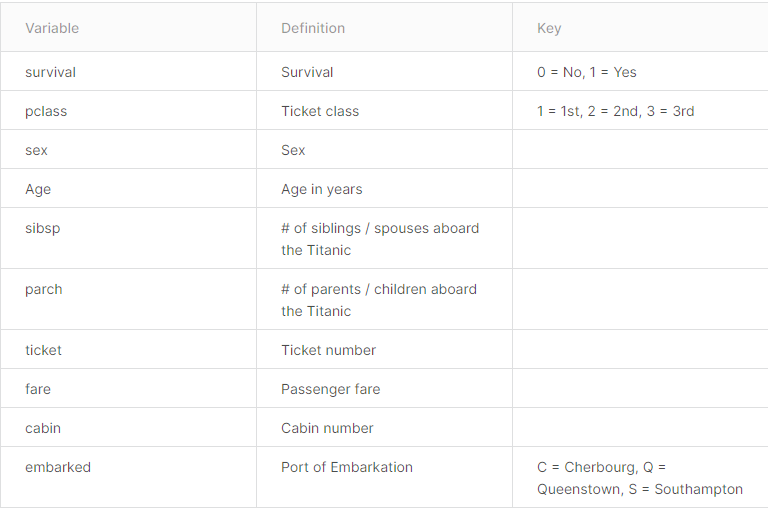

In [3]:
Image(filename="data_dict.png")

In [4]:
# Loading data set:
df_train = pd.read_csv("train.csv")

### The First Looking to Data Set:
* I called it from my function. You can check "util_reporting.py" file on my GitHub. 
* This function turns;
    * First 5 rows of dataframe
    * Last 5 rows of dataframe
    * Row count of dataframe
    * Column count of dataframe
    * List of columns in the dataframe
    * Looking NaN values and datatypes of columns in the dataframe

In [5]:
df_first_look(df_train)

First 5 rows of dataframe:
--------------------------
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


<AxesSubplot:>

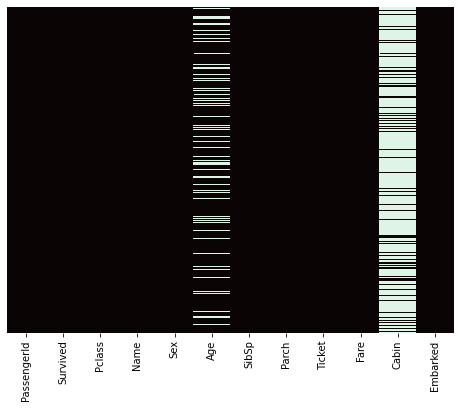

In [6]:
# To see missing values with heatmap:

sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap="mako")

## Data Data Wrangling:
### To Extract Appellation from Names:

* This cell extracts appellations from Name column and create a new column with appellations. 

In [7]:
df_train["Appellation"] = df_train["Name"].str.extract("([A-Za-z]+)\.")

* I called "countplot_viz" from my function. You can check "util_reporting.py" file on my GitHub.
* This function does;
    * This function visualizes a countplot.

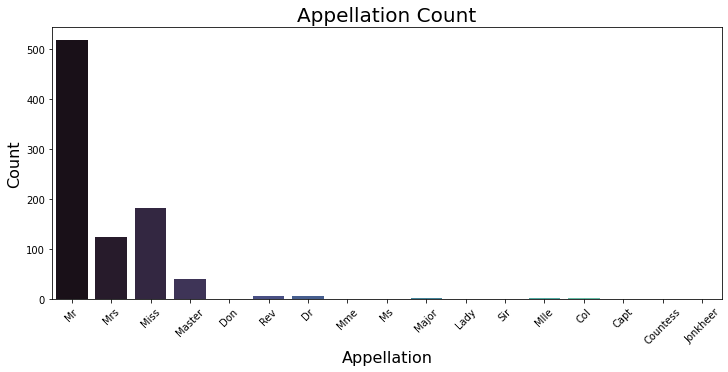

In [8]:
countplot_viz(df_train, "Appellation", "Appellation", "Count", "Appellation Count")

##### How Can Read The Graph: 
* This graph shows count of replaced appellations. 
* x column represents Appelations, y column shows counts of Appelations.

##### Observation:
* There are lots of spelling mistake at the column. 
* We can change wrong names and categorize some names. 

##### For Extracting:
* I called "extract_first_string" from my function. You can check "util_data_cleaning.py" file on my GitHub.
* This function does;
    * Extracting the middle string from name column in the dataframe.
    * Replacing values with correct values in new column.

In [9]:
df_train = extract_first_string(df_train, "Name", "Appellation")

In [10]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


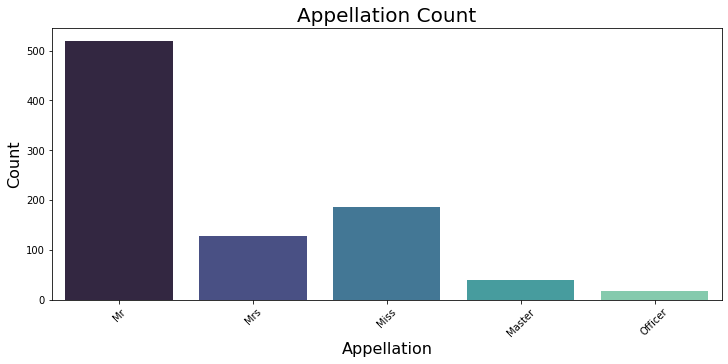

In [11]:
countplot_viz(df_train, "Appellation", "Appellation", "Count", "Appellation Count")

##### How can read the Graph: 
* This graph shows count of replaced appellations. 
* x column represents Appelations, y column shows counts of Appelations.

##### Observation:
* We changed wrong names.
* We categorized some names as "Officer". 
* After all changing, The column is readable. 

### To Fill Missing Values:
#### Age Column:

In [12]:
# To see count of rows and count of missing values of Age column:

print("Count of full rows of Age column:", df_train["Age"].count())
print("Count of missing rows of Age column:", df_train["Age"].isnull().sum())

Count of full rows of Age column: 714
Count of missing rows of Age column: 177


* %20 of Age column rows are missing. 

##### How Can Fill Missing Values (NaN)? 
* We can fill as appellation of People for example;
    * `df_train.groupby('appellation')['Age'].mean()` To check the average age by appellation.
    * `df_train.loc[(df_train.Age.isnull())&(df_train.appellation == 'Mr'),'Age']=33`   Assigning the NaN Values with the found values of the mean ages (We do it for each appellation) 
    * I don't choose this option. Because I have to prepare same line for each appellation again and again.


* We can add some condition for doing specific filling. To group the median age by sex, pclass and title, to have any idea and maybe input in Age NaN's: 
    * `df_train.groupby(["Sex","Pclass","appellation"])["Age"]` We can fill by sex, class of tickets and appellations.  
    * `df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','appellation']).Age.transform('median')` Using the groupby to transform this variables
    

* We can create `a function` with this formulation. Also we can use it at other columns that have missing values or we can use it at future projects.   

##### To Have any Idea for Input in NaNs of Age Column with "df_pivot_aggregated_statistics" Function:
* I called "df_pivot_aggregated_statistics" from my function. You can check "util_reporting.py" file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and calculating aggregation by columns in the dataframe.
    * We look mean and median values of columns for using filling NaN values of Age column. 

In [13]:
column_list = ["Sex", "Pclass", "Appellation"]
descriptive_statistic_list = ["mean", "median"]
df_pivot_aggregated_statistics(df_train, column_list, "Age", descriptive_statistic_list)

                            mean  median
Sex    Pclass Appellation               
female 1      Miss         29.62    29.5
              Mrs          40.86    41.5
              Officer      49.00    49.0
       2      Miss         22.56    24.0
              Mrs          33.68    32.0
       3      Miss         16.12    18.0
              Mrs          33.52    31.0
male   1      Master        5.31     4.0
              Mr           41.61    40.0
              Officer      51.12    51.0
       2      Master        2.26     1.0
              Mr           32.77    31.0
              Officer      42.00    46.5
       3      Master        5.35     4.0
              Mr           28.72    26.0


##### To Fill NaNs Values:
* I called "df_numeric_column_filler_with_aggregated_data" from my function. You can check "util_data_cleaning.py" file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and filling missing values in the column of the dataframe.
    * It works like at above cell and fills all NaN rows with median values of columns. 

In [14]:
column_list = ["Sex", "Pclass", "Appellation"]
df_train = df_numeric_column_filler_with_aggregated_data(df_train, column_list, "Age")

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [38]:
# To see count of rows and count of missing values of Age column:

print("Count of full rows of Age column:", df_train["Age"].count())
print("Count of missing rows of Age column:", df_train["Age"].isnull().sum())

Count of full rows of Age column: 891
Count of missing rows of Age column: 0


#### Understanding Target Variable

In [17]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* Target variable/Dependent variable is discrete and categorical in nature.
* "Pclass" shows class of cabins that are from 1 to 3:  1 = 1st, 2 = 2nd, 3 = 3rd
* All Classes have passangers.

* 3rd class has most passangers.After 3rd, 1st came and 2nd class has less passangers. 

#### To Check Missing Values

<AxesSubplot:>

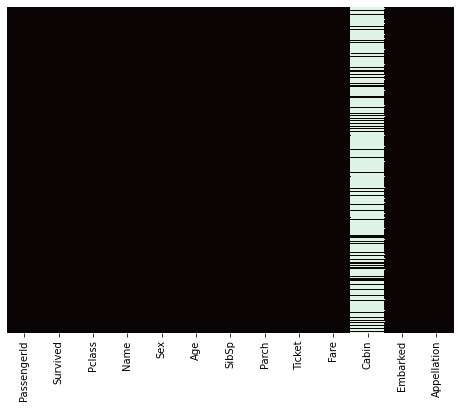

In [18]:
# To see missing values with heatmap:

sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap="mako")

#### Age column :

In [19]:
list_of_column_descriptive = ["Age", "Fare"]
df_descriptive_statistics(df_train, list_of_column_descriptive)

Descriptive Statisctics for column:
--------------------------
               Age        Fare
count  891.000000  891.000000
mean    29.151145   32.204208
std     13.506740   49.693429
min      0.420000    0.000000
25%     21.000000    7.910400
50%     26.000000   14.454200
75%     36.750000   31.000000
max     80.000000  512.329200

Mode values for column:
--------------------------
     Age  Fare
0  26.0  8.05



# boxplot'un quantile methodu üzerinden  ve z score ile açıkla

##### Observations:
* We have ordinal, nominal, dicrete and Continuous columns in this analysis. I'll use only  Continuous columns that are Age and Fare columns. 
* Avg age and median-mode are so closely. Distribution is right skewed (positive skew). Avg passengers age shows that most of passenger is young.
* There are outliers at both columns. 
* Avg , median and mode of Fare are not closely. Distribution is right skewed (positive skew). Median and mode of passenger's fare shows that most of passenger took cheap tickets.

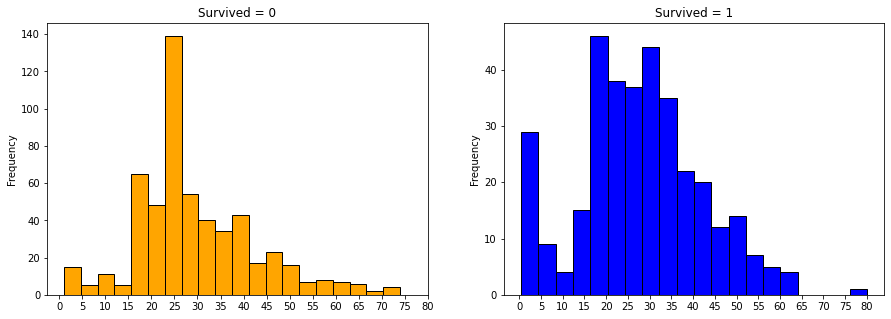

In [20]:
multiple_plot_viz(
    df_train, "Survived", "Age", title_1="Survived = 0", title_2="Survived = 1"
)

##### Observations:
* The age<5 were saved in large numbers(The Women and Child First Policy).
* The group of between 17 and 36 were saved in large numbers. 
* The oldest Passenger was saved(80 years).
* Maximum number of deaths were in the age group of 23-27.

### To See Other Conditions About Survived People:

#### The Relationship between Sex, Pclass and Survived People:

<Figure size 864x360 with 0 Axes>

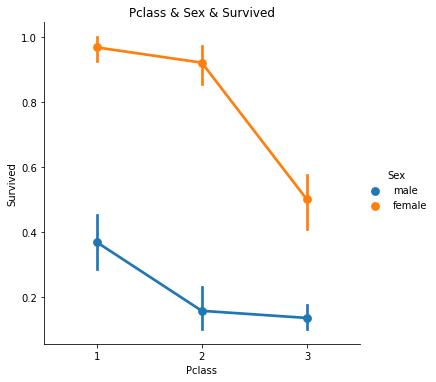

In [21]:
relationship_viz(
    df_train, "Sex", "Survived", "Pclass", title_factor="Pclass & Sex & Survived"
)

##### Observations:
* Because of The Women and Child First Policy, women survived more than men. 
* We can see the discrimination between classes. First class more survived than third class.  
* It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate. 
* Death rate by class:
    * %67,75 third class
    * %17,66 second class
    * %14,59 first class 
* Survived rate by class:
    * %34,80 third class
    * %25,43 second class
    * %39,76 first class

#### The Relationship Between Appellation and Survived People:

In [22]:
pd.crosstab(df_train.Appellation, df_train.Sex).T.style.background_gradient(
    cmap="mako"
)  # Checking the Initials with the Sex

Appellation,Master,Miss,Mr,Mrs,Officer
Sex,,,,,
female,0,186,0,127,1
male,40,0,520,0,17


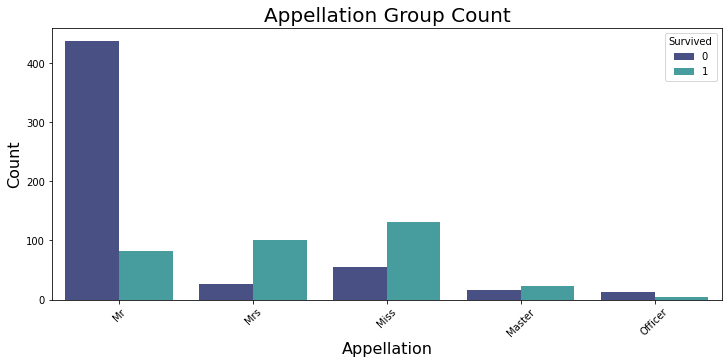

In [23]:
countplot_viz(
    df_train,
    "Appellation",
    "Appellation",
    "Count",
    "Appellation Group Count",
    hue="Survived",
)

##### Observations:
* This charts confirmed us about women and children survived more than men.

#### The Relationship Between Port of Embarkation and Survived People:

In [24]:
pd.crosstab(
    df_train.Survived, df_train.Embarked, margins=True
).style.background_gradient(cmap="mako")

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


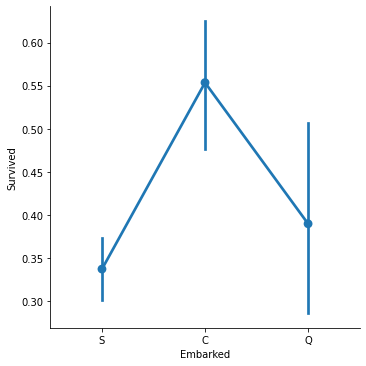

In [25]:
sns.factorplot("Embarked", "Survived", data=df_train)
plt.show()

##### Observations:
* Death rate by Port of Embarkation:
    * %8,56 C = Cherbourg, France
    * %13,67 Q = Queenstown,Ireland
    * %77,77 S = Southampton, England


* Survived rate of Ports: 
    * %55,36 of Cherbourg passangers were survived.
    * %38,96 of Queenstown passangers were survived.
    * %33,70 of Southampton passangers were survived.
    * The chances for survival for Port C is highest around 0.55 while it is lowest for S.

#### The Relationship Between Port of Embarkation, Pclass and Survived People:

In [26]:
pd.crosstab(
    [df_train.Embarked, df_train.Pclass], df_train.Survived, margins=True
).style.background_gradient(cmap="mako")

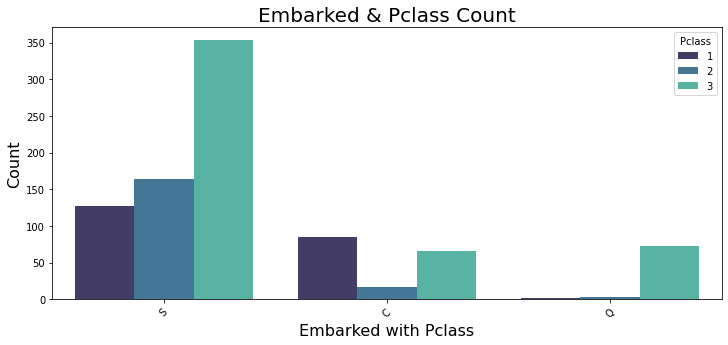

In [27]:
countplot_viz(
    df_train,
    "Embarked",
    "Embarked with Pclass",
    "Count",
    "Embarked & Pclass Count",
    hue="Pclass",
)

In [28]:
pd.crosstab(
    [df_train.Embarked, df_train.Sex], df_train.Survived, margins=True
).style.background_gradient(cmap="mako")

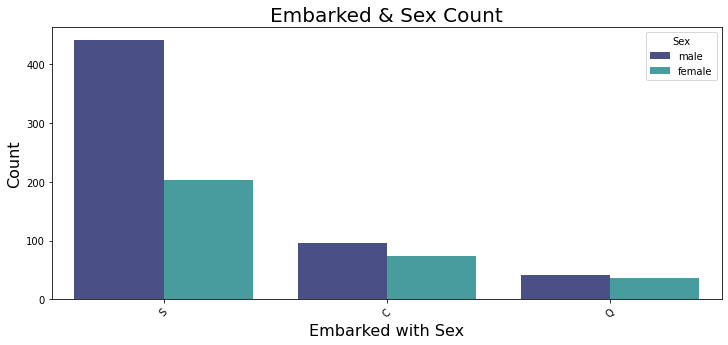

In [29]:
countplot_viz(
    df_train,
    "Embarked",
    "Embarked with Sex",
    "Count",
    "Embarked & Sex Count",
    hue="Sex",
)

##### Observation: 
* Third class passengers mostly embarked from Southampton, England. Top death rate belong this port. 
* Death rate of Port Southampton's men passangers is %85,25. 

#### The Relationship Between SibSp(Sibling/Spouse) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife
    * 0 = The person is alone 1,2,3,4,5,6,7,8 = Number of family person 

In [30]:
pd.crosstab(df_train.SibSp, df_train.Survived, margins=True).style.background_gradient(
    cmap="mako"
)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


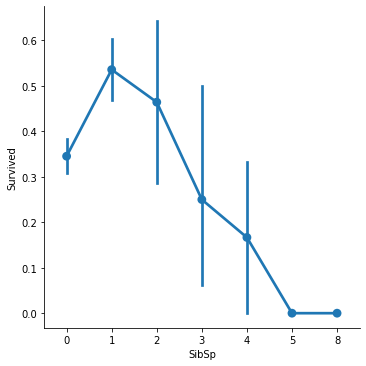

In [31]:
sns.factorplot("SibSp", "Survived", data=df_train)
plt.show()

##### Observation:
* %68,17 of passengers had not sibling and spouse.
* %61,17 of survived passengers were alone. %34,21 of alone passengers were survived. 
* If person have 1 or 2 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. 

#### The Relationship Between Parch( parents / children) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
    * 0 = The person is alone 1,2,3,4,5,6 = Number of family person 

In [32]:
pd.crosstab(df_train.Parch, df_train.Survived, margins=True).style.background_gradient(
    cmap="mako"
)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


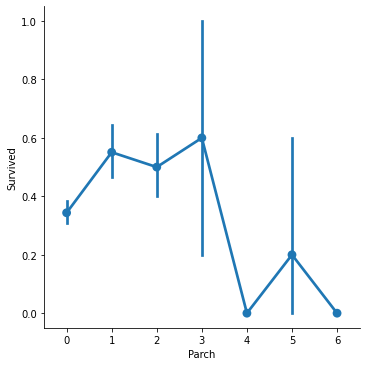

In [33]:
sns.factorplot("Parch", "Survived", data=df_train)
plt.show()

##### Observation:
* %76,09 of passengers had not any parent or child.
* %68,12 of survived passengers were alone. %34,36 of alone passengers were survived. 
* If person have 1, 2 or 3 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. It is same with SibSp column. 

#### The Relationship Between Passanger Fare,Pclass and Survived People:

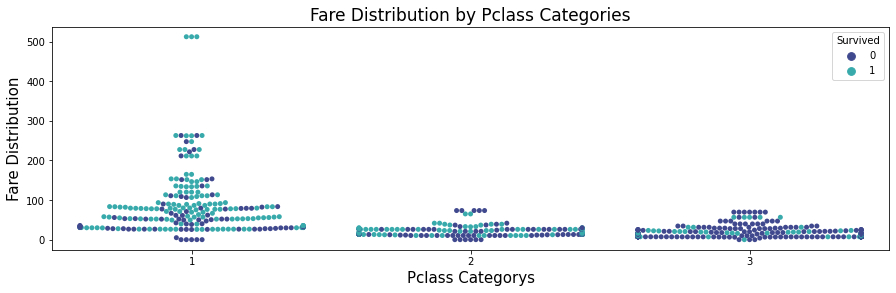

In [34]:
swarmplot_viz(
    df_train,
    "Pclass",
    "Fare",
    "Survived",
    "Pclass Categorys",
    "Fare Distribution",
    "Fare Distribution by Pclass Categories",
)

##### Observation:
* The cheapest ticket fare belong Third class. Most of death in this class. 
* The most expensive ticket fare belong first class. Those who paid the highest fares were survived.

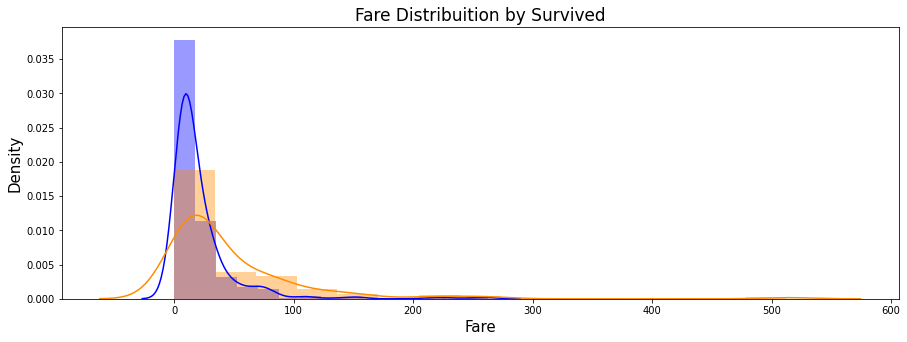

In [35]:
plt.figure(figsize=(15, 5))

# Understanding the Fare Distribuition (Seaborn distplot lets you show a histogram with a line on it.)
sns.distplot(df_train[df_train.Survived == 0]["Fare"], bins=15, color="b")
sns.distplot(df_train[df_train.Survived == 1]["Fare"], bins=15, color="darkorange")
plt.title("Fare Distribuition by Survived", fontsize=17)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

#### Description Statisctics of Fare Variables

In [36]:
column_list = ["Fare"]
df_descriptive_statistics(df_train, column_list)

Descriptive Statisctics for column:
--------------------------
              Fare
count  891.000000
mean    32.204208
std     49.693429
min      0.000000
25%      7.910400
50%     14.454200
75%     31.000000
max    512.329200

Mode values for column:
--------------------------
    Fare
0  8.05



#### The Correlation of Data Set

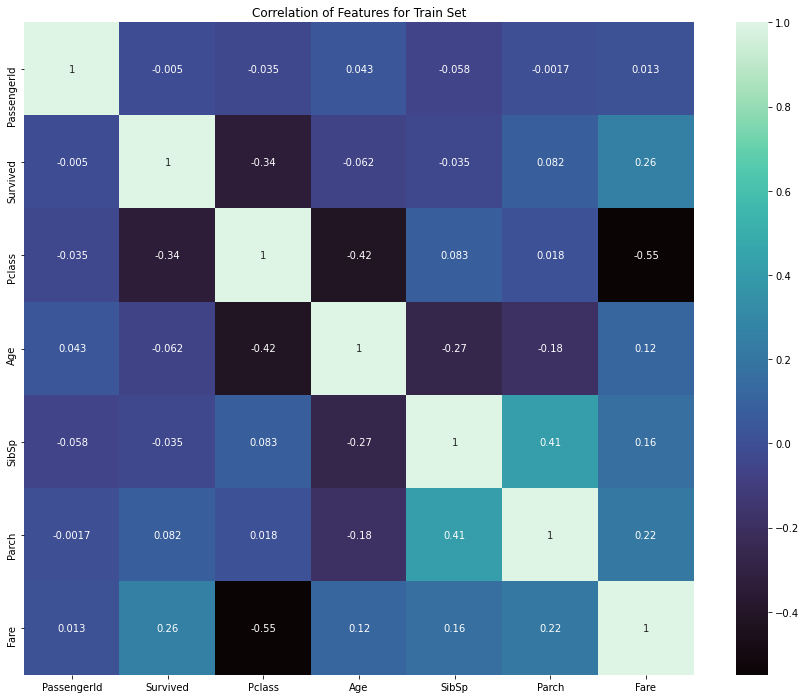

In [37]:
# lets look the correlation of df_train:

plt.figure(figsize=(15, 12))
plt.title("Correlation of Features for Train Set")
sns.heatmap(df_train.corr(), vmax=1.0, annot=True, cmap="mako")
plt.show()

##### Observation:
* The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.
* Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:
    * 1 indicates a strong positive relationship.
    * -1 indicates a strong negative relationship.
    * A result of zero indicates no relationship at all.
* From the above heatmap,we can see that the features are not much correlated. The highest positive correlation is between SibSp and Parch i.e 0.41. The highest negative correlation is between Pclass and Fare i.e -0.55. 